(1024, 1024, 3)
(512, 512, 3)
(256, 256, 3)
(64, 64, 3)


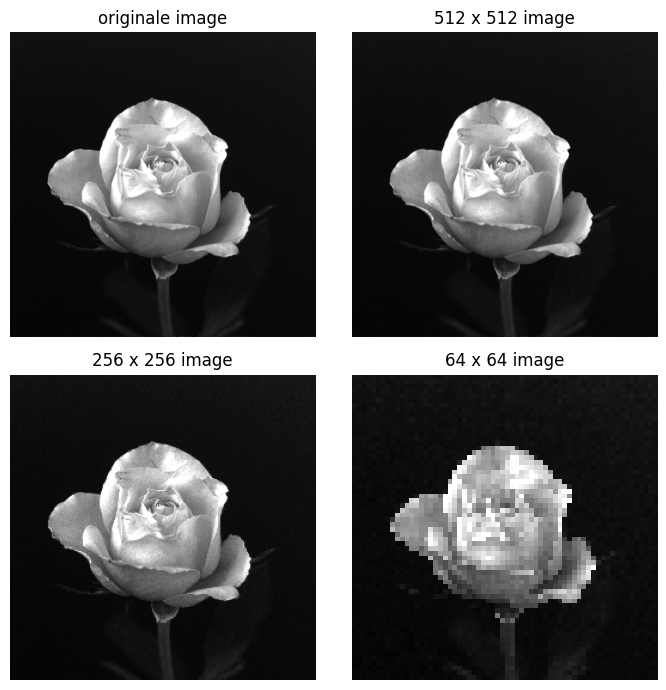

In [3]:
# downsampling of image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('images/rose.tif')
print(img.shape)

img1 = img[::2,::2]
print(img1.shape)

img2 = img1[::2,::2]
print(img2.shape)

img3 = img2[::4,::4]
print(img3.shape)

fig , axe = plt.subplots(2,2, figsize = (7 , 7))

axe[0,0].imshow(img)
axe[0,0].axis('off')
axe[0,0].set_title('originale image')

axe[0,1].imshow(img1)
axe[0,1].axis('off')
axe[0,1].set_title('512 x 512 image')

axe[1,0].imshow(img2)
axe[1,0].axis('off')
axe[1,0].set_title('256 x 256 image')

axe[1,1].imshow(img3)
axe[1,1].axis('off')
axe[1,1].set_title('64 x 64 image')

plt.axis('off')
plt.tight_layout()


(64, 64, 3)
(128, 128, 3)


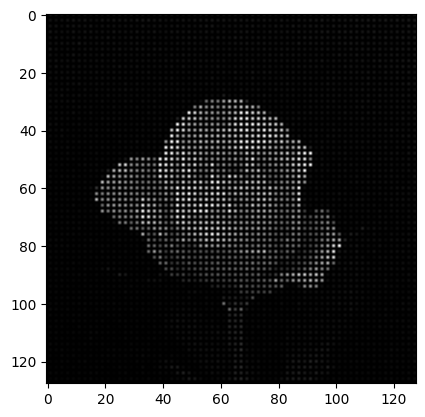

In [52]:
# upsampling of image

plt.imshow(img3)
print(img3.shape)

upsampl_img3 = np.zeros((128,128,3), dtype=np.uint8)
print(upsampl_img3.shape)

upsampl_img3[::2,1::2] = img3
plt.imshow(upsampl_img3, cmap='gray')

plt.imshow(upsampl_img3, cmap='gray')

(1024, 1024, 3)
(128, 128, 3)
(1024, 1024, 3)
(128, 128, 3)
(1024, 1024, 3)


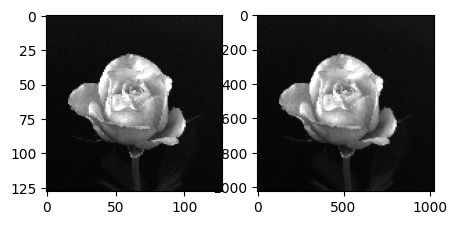

In [ ]:
# upsampling 

img = cv2.imread('images/rose.tif')

print(img.shape)
 
# downsampling of image
img256 = img[::8,::8]
print(img256.shape)

# upsampling of image
img256us = np.zeros((img256.shape[0] * 8,img256.shape[1] * 8,3) , dtype = np.uint8)
print(img256us.shape)

for i in range(8):
    for j in range(8):
        img256us[i::8,j::8] = img256
        

fig , axe = plt.subplots(1,3, figsize= (5,5) )

axe[0].imshow(img256)
print(img256.shape)

axe[1].imshow(img256us)
print(img256us.shape)


In [1]:
# seperate the red green and blue channel
img = cv2.imread('images/peppers.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blue = img[:,:,0]
green = img[:,:,1]
red = img[:,:,1]

fig , axe = plt.subplots(2,2, figsize = (7,7))

axe[0,0].imshow(img)
axe[0,0].axis('off')

axe[0,1].imshow(blue)
axe[0,1].axis('off')
axe[0,1].set_title("blue")

axe[1,0].imshow(green)
axe[1,0].axis('off')
axe[1,0].set_title("green")

axe[1,1].imshow(red)
axe[1,1].axis('off')
axe[1,1].set_title('red')

plt.tight_layout()

NameError: name 'cv2' is not defined

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

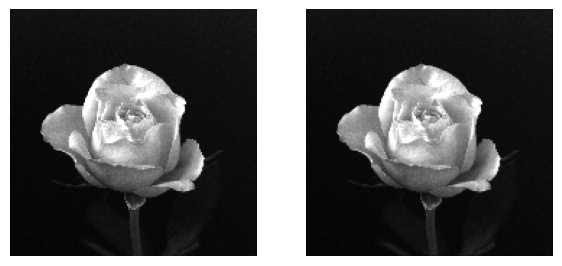

In [32]:
# using interpolation manually 

img = cv2.imread('images/rose.tif')

img1 = img[::6,::6]

img2 = np.zeros((1024,1024,3), dtype=('uint8'))

row_scale = 171 / 1024
colums_scale = 171 / 1024

for i in range(img2.shape[0] -1):
    r = int(i * row_scale)
    for j in range(img2.shape[1] - 1):
        c = int(j * colums_scale)
        img2[i,j] = img1[r,c]
        
fig, axe = plt.subplots(1,2, figsize = (7,7))

axe[0].imshow(img1)
axe[0].axis('off')

axe[1].imshow(img2)
axe[1].axis('off')


(1200, 1200, 3)


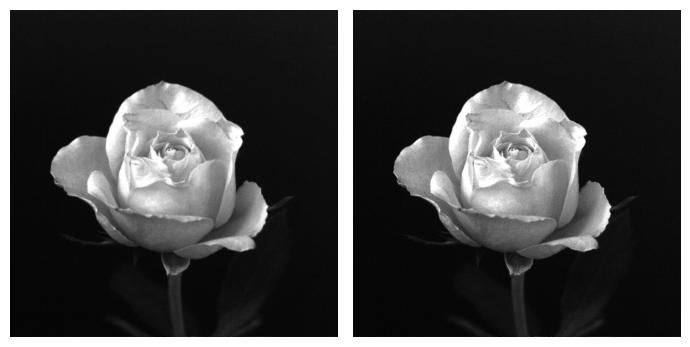

In [11]:
# use built in function to show the interpolation

bilinear = cv2.resize(img1, (1024,1024), interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(img1, (1200,1200), interpolation=cv2.INTER_CUBIC)

fig, axe = plt.subplots(1,2, figsize=(7,7))

axe[0].imshow(bilinear)
axe[0].axis('off')
axe[1].imshow(bicubic)
plt.axis('off')
print(bicubic.shape)
plt.tight_layout()